In [1]:
%matplotlib inline

In [2]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [3]:
business_abspath = os.path.abspath("../data/business.csv")
df = pd.read_csv(business_abspath)

In [83]:
category_abspath = os.path.abspath("../data/categories.txt")
categories=[]
with open(category_abspath) as f:   
    reader = csv.reader(f)
    for ele in reader:
        categories.extend(ele)
categories = [i.strip() for i in categories]

In [206]:
df.head()

,attributes,business_id,categories,city,full_address,name,open,review_count,stars,state,...,Local Services,Mass Media,Nightlife,Pets,Professional Services,Public Services & Government,Real Estate,Religious Organizations,Restaurants,Shopping
0,"{'Accepts Credit Cards': True, 'Drive-Thru': F...",5UmKMjUEUNdYWqANhGckJw,"[Fast Food, Restaurants]",Dravosburg,"4734 Lebanon Church Rd\nDravosburg, PA 15034",Mr Hoagie,True,7,3.5,PA,...,0,0,0,0,0,0,0,0,1,0
1,"{'Accepts Credit Cards': True, 'Good For Group...",UsFtqoBl7naz8AVUBZMjQQ,[Nightlife],Dravosburg,"202 McClure St\nDravosburg, PA 15034",Clancy's Pub,True,5,3.0,PA,...,0,0,1,0,0,0,0,0,0,0
2,{'Good for Kids': True},cE27W9VPgO88Qxe4ol6y_g,"[Active Life, Mini Golf, Golf]",Bethel Park,"1530 Hamilton Rd\nBethel Park, PA 15234",Cool Springs Golf Center,False,5,2.5,PA,...,0,0,0,0,0,0,0,0,0,0
3,"{'Accepts Credit Cards': True, 'Good for Kids'...",mVHrayjG3uZ_RLHkLj-AMg,"[Bars, American (New), Nightlife, Lounges, Res...",Braddock,"414 Hawkins Ave\nBraddock, PA 15104",Emil's Lounge,True,26,4.5,PA,...,0,0,1,0,0,0,0,0,1,0
4,"{'Accepts Credit Cards': True, 'Good For Group...",mYSpR_SLPgUVymYOvTQd_Q,"[Active Life, Golf]",Braddock,"1000 Clubhouse Dr\nBraddock, PA 15104",Grand View Golf Club,True,3,5.0,PA,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df['categories'] = df['categories'].apply(lambda s:
                   [i.strip() for i in s.split('[')[-1].split(']')[0].replace('\'','').split(',')])

In [92]:
for ele in categories:
    df[ele] = df['categories'].apply(lambda x: 1 if ele in x else 0)

In [102]:
slices = [df[ele].sum() for ele in categories]

In [139]:
df_result = pd.DataFrame(slices,index=categories,columns=['count'])
df_result.sort_values(by='count',inplace=True,ascending=False)
df_result.reset_index(inplace=True)
df_result.columns = ['category','count']
df_result

,category,count
0,Restaurants,20920
1,Shopping,11108
2,Food,8078
3,Beauty & Spas,7134
4,Health & Medical,5981
5,Home Services,5810
6,Automotive,4807
7,Nightlife,4254
8,Local Services,3920
9,Active Life,3172


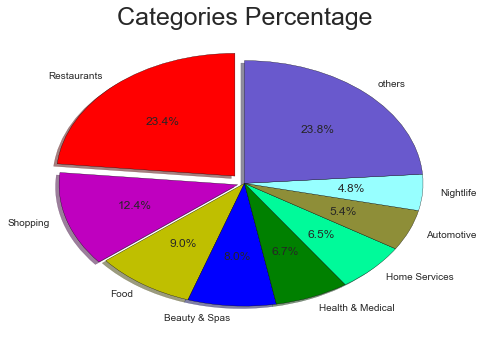

In [200]:
fig = plt.figure()
ax = plt.subplot(111)
N = 8
categories_top = list(df_result[:N]['category'].values)
categories_top.append('others')
slices_top = list(df_result[:N]['count'].values)
slices_top.append(df_result[N:]['count'].sum())

cols = ['r','m','y','b','g','#00FA9A','#8E8E38','#97FFFF','#6959CD','#778899','#7FFF00']
ax.pie(slices_top,labels=categories_top,colors=cols,startangle=90,shadow= True,
       explode = (0.08,0.04)+(0,)*(N-1),labeldistance=1.1,autopct='%1.1f%%')
ax.set_title('Categories Percentage',fontsize=25)

plt.show()